In [435]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, DBSCAN, MeanShift
from sklearn.metrics import silhouette_score
import random
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
random.seed(42)

In [436]:
df = pd.read_csv(r"C:\Users\gabri\Downloads\chatbot_data.csv")

In [437]:
df.head()

,session_start,session_end,total_clicks,left_contact_info
0,2023-01-01 8:01,2023-01-01 8:05,8,1
1,2023-01-02 10:17,2023-01-02 10:21,4,0
2,2023-01-03 9:33,2023-01-03 9:37,5,1
3,2023-01-04 11:46,2023-01-04 11:49,6,0
4,2023-01-05 8:21,2023-01-05 8:25,3,1


In [438]:
df.describe(include="all")

,session_start,session_end,total_clicks,left_contact_info
count,111,111,111.000000,111.000000
unique,60,60,NaN,NaN
top,2023-01-01 8:01,2023-01-01 8:05,NaN,NaN
freq,2,2,NaN,NaN
mean,NaN,NaN,5.135135,0.504505
std,NaN,NaN,1.988542,0.502247
min,NaN,NaN,2.000000,0.000000
25%,NaN,NaN,3.500000,0.000000
50%,NaN,NaN,5.000000,1.000000
75%,NaN,NaN,7.000000,1.000000


In [439]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   session_start      111 non-null    object
 1   session_end        111 non-null    object
 2   total_clicks       111 non-null    int64 
 3   left_contact_info  111 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 3.6+ KB


In [440]:
# Transform datetime to a datetime data format
df['session_start'] = pd.to_datetime(df['session_start'])
df['session_end'] = pd.to_datetime(df['session_end'])

In [441]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   session_start      111 non-null    datetime64[ns]
 1   session_end        111 non-null    datetime64[ns]
 2   total_clicks       111 non-null    int64         
 3   left_contact_info  111 non-null    int64         
dtypes: datetime64[ns](2), int64(2)
memory usage: 3.6 KB


In [442]:
df.head()

,session_start,session_end,total_clicks,left_contact_info
0,2023-01-01 08:01:00,2023-01-01 08:05:00,8,1
1,2023-01-02 10:17:00,2023-01-02 10:21:00,4,0
2,2023-01-03 09:33:00,2023-01-03 09:37:00,5,1
3,2023-01-04 11:46:00,2023-01-04 11:49:00,6,0
4,2023-01-05 08:21:00,2023-01-05 08:25:00,3,1


In [443]:
df.head()

,session_start,session_end,total_clicks,left_contact_info
0,2023-01-01 08:01:00,2023-01-01 08:05:00,8,1
1,2023-01-02 10:17:00,2023-01-02 10:21:00,4,0
2,2023-01-03 09:33:00,2023-01-03 09:37:00,5,1
3,2023-01-04 11:46:00,2023-01-04 11:49:00,6,0
4,2023-01-05 08:21:00,2023-01-05 08:25:00,3,1


In [444]:
df['session_duration'] = df['session_end'] - df['session_start']

In [445]:
df.describe(include='all')

,session_start,session_end,total_clicks,left_contact_info,session_duration
count,111,111,111.000000,111.000000,111
mean,2023-01-28 21:43:08.108108288,2023-01-28 21:47:08.108107776,5.135135,0.504505,0 days 00:04:00
min,2023-01-01 08:01:00,2023-01-01 08:05:00,2.000000,0.000000,0 days 00:03:00
25%,2023-01-14 23:33:30,2023-01-14 23:37:00,3.500000,0.000000,0 days 00:04:00
50%,2023-01-28 09:45:00,2023-01-28 09:49:00,5.000000,1.000000,0 days 00:04:00
75%,2023-02-11 11:20:00,2023-02-11 11:24:00,7.000000,1.000000,0 days 00:04:00
max,2023-03-01 13:10:00,2023-03-01 13:15:00,9.000000,1.000000,0 days 00:05:00
std,NaN,NaN,1.988542,0.502247,0 days 00:00:26.832815729


In [446]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   session_start      111 non-null    datetime64[ns] 
 1   session_end        111 non-null    datetime64[ns] 
 2   total_clicks       111 non-null    int64          
 3   left_contact_info  111 non-null    int64          
 4   session_duration   111 non-null    timedelta64[ns]
dtypes: datetime64[ns](2), int64(2), timedelta64[ns](1)
memory usage: 4.5 KB


In [447]:
#Convert all units into seconds
year = 60 * 60 * 24 * 365.25
month = 60 * 60 * 24 * 365.25 // 12
day = 60 * 60 * 24
hour = 60 * 60
minute = 60

df['session_duration_complete_seconds'] = df['session_duration'].dt.total_seconds()
df['session_duration_year'] = df['session_duration_complete_seconds'] // year
df['session_duration_month'] = df['session_duration_complete_seconds'] % year // month
df['session_duration_day'] = df['session_duration_complete_seconds'] % month // day
df['session_duration_hour'] = df['session_duration_complete_seconds'] % day // hour
df['session_duration_minute'] = df['session_duration_complete_seconds'] % hour // minute
df['session_duration_years'] = df['session_duration_complete_seconds'] % minute
df.drop(columns=['session_duration_complete_seconds'], inplace=True)

In [448]:
df.describe(include='all')

,session_start,session_end,total_clicks,left_contact_info,session_duration,session_duration_year,session_duration_month,session_duration_day,session_duration_hour,session_duration_minute,session_duration_years
count,111,111,111.000000,111.000000,111,111.0,111.0,111.0,111.0,111.000000,111.0
mean,2023-01-28 21:43:08.108108288,2023-01-28 21:47:08.108107776,5.135135,0.504505,0 days 00:04:00,0.0,0.0,0.0,0.0,4.000000,0.0
min,2023-01-01 08:01:00,2023-01-01 08:05:00,2.000000,0.000000,0 days 00:03:00,0.0,0.0,0.0,0.0,3.000000,0.0
25%,2023-01-14 23:33:30,2023-01-14 23:37:00,3.500000,0.000000,0 days 00:04:00,0.0,0.0,0.0,0.0,4.000000,0.0
50%,2023-01-28 09:45:00,2023-01-28 09:49:00,5.000000,1.000000,0 days 00:04:00,0.0,0.0,0.0,0.0,4.000000,0.0
75%,2023-02-11 11:20:00,2023-02-11 11:24:00,7.000000,1.000000,0 days 00:04:00,0.0,0.0,0.0,0.0,4.000000,0.0
max,2023-03-01 13:10:00,2023-03-01 13:15:00,9.000000,1.000000,0 days 00:05:00,0.0,0.0,0.0,0.0,5.000000,0.0
std,NaN,NaN,1.988542,0.502247,0 days 00:00:26.832815729,0.0,0.0,0.0,0.0,0.447214,0.0


In [449]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype          
---  ------                   --------------  -----          
 0   session_start            111 non-null    datetime64[ns] 
 1   session_end              111 non-null    datetime64[ns] 
 2   total_clicks             111 non-null    int64          
 3   left_contact_info        111 non-null    int64          
 4   session_duration         111 non-null    timedelta64[ns]
 5   session_duration_year    111 non-null    float64        
 6   session_duration_month   111 non-null    float64        
 7   session_duration_day     111 non-null    float64        
 8   session_duration_hour    111 non-null    float64        
 9   session_duration_minute  111 non-null    float64        
 10  session_duration_years   111 non-null    float64        
dtypes: datetime64[ns](2), float64(6), int64(2), timedelta64[ns](1)
memory usage: 9.7 KB


In [450]:
df['total_clicks_per_minute'] = df['total_clicks'] / df['session_duration_minute']

In [451]:
df.head()

,session_start,session_end,total_clicks,left_contact_info,session_duration,session_duration_year,session_duration_month,session_duration_day,session_duration_hour,session_duration_minute,session_duration_years,total_clicks_per_minute
0,2023-01-01 08:01:00,2023-01-01 08:05:00,8,1,0 days 00:04:00,0.0,0.0,0.0,0.0,4.0,0.0,2.00
1,2023-01-02 10:17:00,2023-01-02 10:21:00,4,0,0 days 00:04:00,0.0,0.0,0.0,0.0,4.0,0.0,1.00
2,2023-01-03 09:33:00,2023-01-03 09:37:00,5,1,0 days 00:04:00,0.0,0.0,0.0,0.0,4.0,0.0,1.25
3,2023-01-04 11:46:00,2023-01-04 11:49:00,6,0,0 days 00:03:00,0.0,0.0,0.0,0.0,3.0,0.0,2.00
4,2023-01-05 08:21:00,2023-01-05 08:25:00,3,1,0 days 00:04:00,0.0,0.0,0.0,0.0,4.0,0.0,0.75


In [452]:
df2 = df.copy()

In [453]:
df2 = df2.select_dtypes(exclude=['datetime64[ns]', 'timedelta64[ns]'])

In [454]:
df2.describe(include='all')

,total_clicks,left_contact_info,session_duration_year,session_duration_month,session_duration_day,session_duration_hour,session_duration_minute,session_duration_years,total_clicks_per_minute
count,111.000000,111.000000,111.0,111.0,111.0,111.0,111.000000,111.0,111.000000
mean,5.135135,0.504505,0.0,0.0,0.0,0.0,4.000000,0.0,1.303754
std,1.988542,0.502247,0.0,0.0,0.0,0.0,0.447214,0.0,0.522918
min,2.000000,0.000000,0.0,0.0,0.0,0.0,3.000000,0.0,0.400000
25%,3.500000,0.000000,0.0,0.0,0.0,0.0,4.000000,0.0,1.000000
50%,5.000000,1.000000,0.0,0.0,0.0,0.0,4.000000,0.0,1.250000
75%,7.000000,1.000000,0.0,0.0,0.0,0.0,4.000000,0.0,1.750000
max,9.000000,1.000000,0.0,0.0,0.0,0.0,5.000000,0.0,2.250000


In [455]:
df2.columns

Index(['total_clicks', 'left_contact_info', 'session_duration_year',
       'session_duration_month', 'session_duration_day',
       'session_duration_hour', 'session_duration_minute',
       'session_duration_years', 'total_clicks_per_minute'],
      dtype='object')

In [456]:
numerical_features = df2.columns.drop(['left_contact_info'])

In [457]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features)])

In [458]:
df2[numerical_features] = preprocessor.fit_transform(df2[numerical_features])

In [459]:
df2

,total_clicks,left_contact_info,session_duration_year,session_duration_month,session_duration_day,session_duration_hour,session_duration_minute,session_duration_years,total_clicks_per_minute
0,1.447220,1,0.0,0.0,0.0,0.0,0.000000,0.0,1.337503
1,-0.573427,0,0.0,0.0,0.0,0.0,0.000000,0.0,-0.583517
2,-0.068265,1,0.0,0.0,0.0,0.0,0.000000,0.0,-0.103262
3,0.436897,0,0.0,0.0,0.0,0.0,-2.246209,0.0,1.337503
4,-1.078588,1,0.0,0.0,0.0,0.0,0.000000,0.0,-1.063772
...,...,...,...,...,...,...,...,...,...
106,-0.573427,0,0.0,0.0,0.0,0.0,0.000000,0.0,-0.583517
107,-0.068265,1,0.0,0.0,0.0,0.0,0.000000,0.0,-0.103262
108,1.447220,0,0.0,0.0,0.0,0.0,0.000000,0.0,1.337503
109,-1.583750,1,0.0,0.0,0.0,0.0,0.000000,0.0,-1.544027


In [460]:
df3 = np.array(df2)

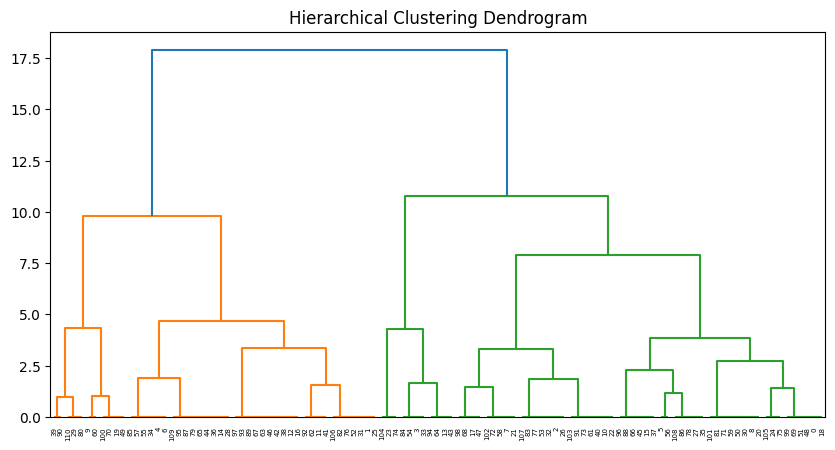

In [461]:
# Generate linkage matrix
Z = linkage(df3, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

DBSCAN Silhouette Score: 0.9999999965525788


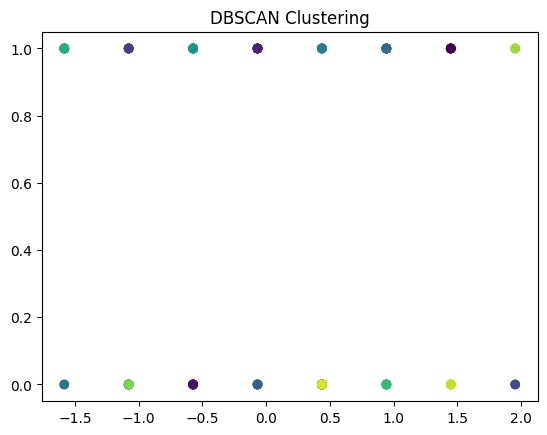

In [462]:
# Applying DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=1)
dbscan_labels = dbscan.fit_predict(df3)

# Silhouette Score
# Note: DBSCAN can result in noise data point with label -1
# Only include points that are part of a cluster
if len(set(dbscan_labels)) > 1:
    dbscan_sil_score = silhouette_score(df3, dbscan_labels)
    print(f"DBSCAN Silhouette Score: {dbscan_sil_score}")

# Plotting
plt.scatter(df3[:, 0], df3[:, 1], c=dbscan_labels)
plt.title('DBSCAN Clustering')
plt.show()